# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [28]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn import metrics # вычисление метрик в sklearn в модуле metrics
import io
from sklearn.linear_model import LinearRegression
# скрытие сообщений об ошибках при обработке ответов
import warnings
# игнорируем предупреждения
warnings.filterwarnings('ignore')
%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


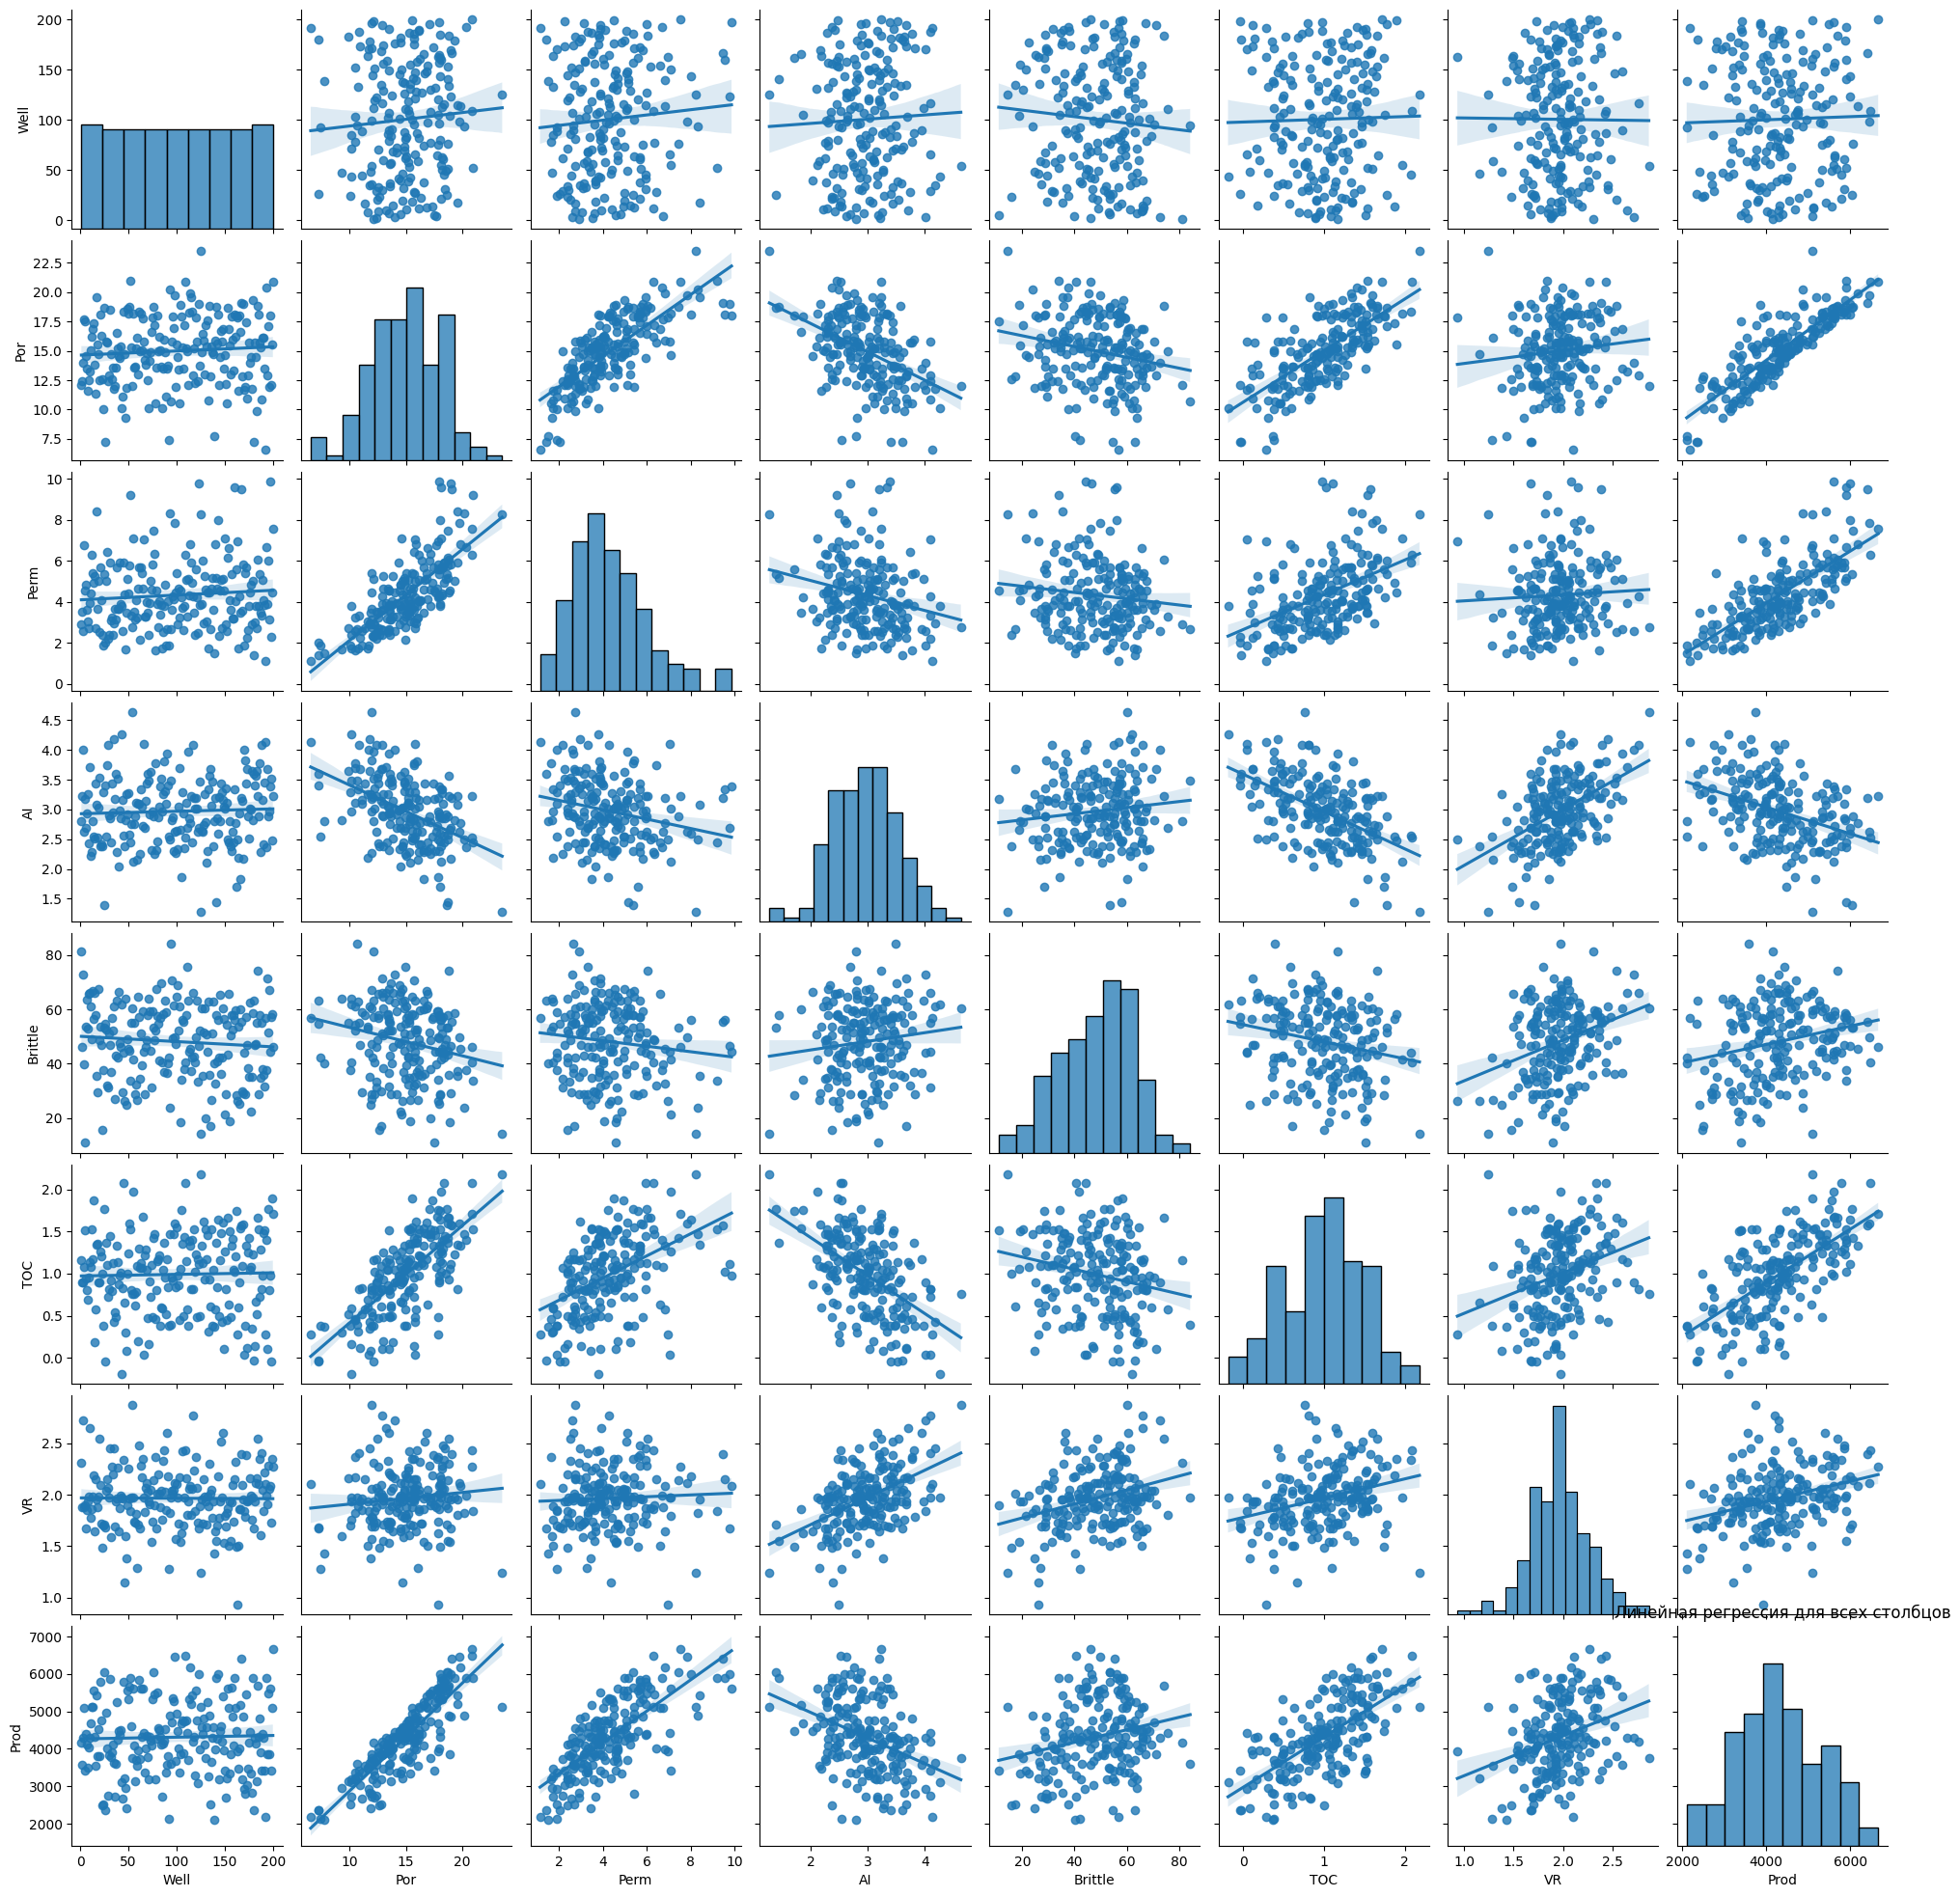

In [4]:
# Строим линейную регрессию для всех столбцов
sns.pairplot(data, kind='reg')

# Добавляем заголовок
plt.title('Линейная регрессия для всех столбцов')

# Отображаем график
plt.show()

Если отбросить идентификатор скважины то видно, что распределение признаков хоть и не является нормальным, но близко к нему

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг матрицы корреляций: 8
Определитель матрицы корреляций: 0.0007299


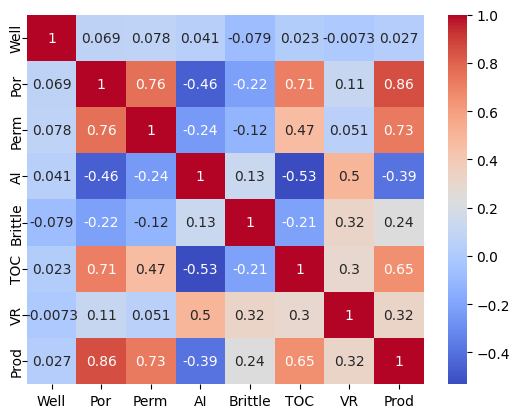

In [5]:
# строим матрицу корреляций
corr_matrix1 = np.corrcoef(data, rowvar=False)
print('Ранг матрицы корреляций:', np.linalg.matrix_rank(corr_matrix1))
print('Определитель матрицы корреляций: {:.7f}'.format(np.linalg.det(corr_matrix1)))

# строим тепловую карту
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')

# добавляем подписи столбцов на тепловой карте
plt.xticks(np.arange(len(data.columns))+0.5, data.columns, rotation=0, ha='center', fontsize=10)
plt.yticks(np.arange(len(data.columns))+0.5, data.columns, ha='center', fontsize=10, va='center', rotation=90)

# отображаем график
plt.show()


> * Какие факторы сильнее всего коррелируют с целевой переменной?

С целевой переменной сильнее всего коррелирует призник пористости скважины. 

* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?

Да является

* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?

Корреляция высокая только с целевым признаком и пористости скважины

* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

Да, модель классической линейной регрессии по методу наименьших квадратов применима в случае распределения признаков близкого к нормальному. Это связано с тем, что модель предполагает нормальное распределение ошибок и оптимальность оценок параметров достигается при выполнении условий нормальности ошибок и гомоскедастичности (одинаковости дисперсий ошибок) в каждой из рассматриваемых подгрупп. Если эти условия не выполняются, то результаты модели могут быть неправильными или ненадежными.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [6]:
#X - матрица наблюдений, y - столбец правильных ответов
X = data.drop('Prod', axis=1)
y = data['Prod']

In [7]:
# Решение уравнения Y = Xw
#w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
A = np.column_stack((np.ones(X.shape[0]),X))
Q = np.linalg.inv(A.T @ A)
w = Q @ A.T @ y
# Вывод вектора весов с подписями столбцов

# создаем объект StringIO
output = io.StringIO()

# записываем вывод цикла в объект StringIO
for feature, weight in zip(['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'], np.round(w).astype(int)):
    print(f'{feature}: {weight}', file=output)

# получаем значение, записанное в объект StringIO
output_str = output.getvalue()
# выводим значение переменной output_str
print(output_str)

y_pred = A @ w
# Выберем метрики для оценки качества модели
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_pred) * 100))
# Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_pred)))

Well: -1232
Por: 0
Perm: 230
AI: 116
Brittle: -365
TOC: 25
VR: -78

MAPE score: 3.628 %
R2 score: 0.960


> * Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?

Да это признак Well

>* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.

если увеличить Prem на 1% то Prod вырастет на 230 млн.фунтов кубических если другие признаки будут зафиксированы, аналогично AI на 116 млн. и TOC на 25млн.  


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [8]:
# Параметры скважины 
Well=106.00
Por=15.32
Perm=3.71
AI=3.29
Brittle=55.99
TOC=1.35
VR=2.42

# Сделаем прогноз выработки скважины 
new = np.array([1, Well, Por, Perm, AI, Brittle, TOC, VR])
y_predict = np.dot(A, w)

print('pred:', np.dot(new, w))

# Выберем метрики для оценки качества модели
mape_score = metrics.mean_absolute_percentage_error(y, y_predict) * 100
r2_score = metrics.r2_score(y, y_predict)

print('MAPE score: {:.3f} %'.format(mape_score))
print('R2 score: {:.3f}'.format(r2_score))

pred: 4723.064053707485
MAPE score: 3.628 %
R2 score: 0.960


> В нашем случае коэффициент детерминации равен 0.960, это означает, что модель близка к идеальной.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [9]:
corr_matrix_Prod = data.corrwith(data['Prod'])

In [10]:
# вывод вектора МНК и матрицы корреляций для сравнения значений
output = io.StringIO()
print(f'вектора МНК:\n{output_str}', file=output)
print(f'корреляция с целевым признаком:\n{round(corr_matrix_Prod[:7], 4)}', file=output)
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_pred) * 100), file=output)
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_pred)), file=output)

result = output.getvalue()
print(result)


вектора МНК:
Well: -1232
Por: 0
Perm: 230
AI: 116
Brittle: -365
TOC: 25
VR: -78

корреляция с целевым признаком:
Well       0.0268
Por        0.8619
Perm       0.7274
AI        -0.3908
Brittle    0.2372
TOC        0.6544
VR         0.3232
dtype: float64
MAPE score: 3.628 %
R2 score: 0.960



> В этом случае коэффициенты МНК могут отличаться от корреляции.

>Например, коэффициент МНК для признака Well имеет отрицательное значение, что говорит о том, что этот признак оказывает негативное влияние на целевой признак. В то же время, корреляция для этого признака близка к нулю, что означает, что связь между этими признаками слабая или отсутствует. Таким образом, отрицательный коэффициент МНК для признака Well мог бы объясняться другими факторами, которые не учитываются корреляцией.

>В целом, разница между коэффициентами МНК и корреляцией может быть вызвана различными причинами, включая нелинейные зависимости между признаками, наличие мультиколлинеарности, выбросы и т.д. Поэтому, чтобы правильно интерпретировать результаты анализа данных, необходимо учитывать все эти факторы

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [11]:
# выбор наиболее коррелирующих факторов 
corr_matrix = data.corr()
corr_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
corr_pairs = corr_pairs[corr_pairs != 1]
top_corr_pairs = corr_pairs.index[:5]

# вывод наиболее коррелирующих пар факторов
print('Топ-5 коррелирующих факторов:')
for pair in top_corr_pairs:
   corr_value = corr_matrix.loc[pair[0], pair[1]]
   print(f"{pair[0]} и {pair[1]}: {corr_value:.3f}")

Топ-5 коррелирующих факторов:
Prod и Por: 0.862
Por и Perm: 0.761
Prod и Perm: 0.727
Por и TOC: 0.712
TOC и Prod: 0.654


Из вывода следует, что наиболее сильно связаны между собой факторы Prod - Por, Por - Perm и Por - TOC. Исключаем Perm и TOC, оставляем Por, также удаляем фактор Well, т.к. корреляция с целевой переменной ~0.03.

In [12]:
drop_columns = ['Perm', 'TOC', 'Well']
data.drop(columns=drop_columns, axis=1, inplace=True)

In [13]:
X = data.drop('Prod', axis=1)
y = data['Prod']

In [14]:
A = np.column_stack((np.ones(X.shape[0]),X))
Q = np.linalg.inv(A.T @ A)
w = Q @ A.T @ y

# Вывод вектора весов с подписями столбцов
# создаем объект StringIO
output2 = io.StringIO()
# записываем вывод цикла в объект StringIO
for feature, weight in zip(['Por', 'AI', 'Brittle', 'VR'], np.round(w).astype(int)):
    print(f'{feature}: {weight}', file=output2)
# получаем значение, записанное в объект StringIO
output_str2 = output2.getvalue()
# выводим значение переменной output_str
print(output_str2)

y_predict_new = A @ w
# Выберем метрики для оценки качества модели
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_new) * 100))
# Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_new)))


Por: -1835
AI: 293
Brittle: -200
VR: 28

MAPE score: 4.044 %
R2 score: 0.945


Ранг матрицы корреляций: 5
Определитель матрицы корреляций: 0.0201807


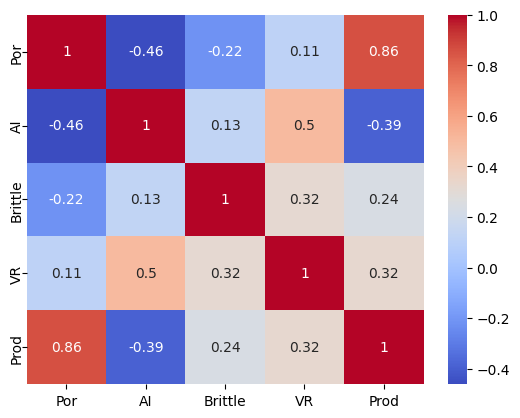

In [15]:
# строим матрицу корреляций
corr_matrix2 = np.corrcoef(data, rowvar=False)
print('Ранг матрицы корреляций:', np.linalg.matrix_rank(corr_matrix2))
print('Определитель матрицы корреляций: {:.7f}'.format(np.linalg.det(corr_matrix2)))

# строим тепловую карту
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')

# добавляем подписи столбцов на тепловой карте
plt.xticks(np.arange(len(data.columns))+0.5, data.columns, rotation=0, ha='center', fontsize=10)
plt.yticks(np.arange(len(data.columns))+0.5, data.columns, ha='center', fontsize=10, va='center', rotation=90)

# отображаем график
plt.show()

In [16]:
corr_matrix_Prod2 = data.corrwith(data['Prod'])

In [17]:
# вывод MAPE score, R2 score, вектора МНК и матрицы корреляций для сравнения значений после очистки
out = io.StringIO()
print(f'Вектора МНК:\n{output_str2}', file=out)
print(f'Корреляция с целевым признаком:\n{round(corr_matrix_Prod2[:4], 4)}', file=out)
print(f'MAPE score: {metrics.mean_absolute_percentage_error(y, y_predict_new) * 100:.3f} %', file=out)
print(f'R2 score: {metrics.r2_score(y, y_predict_new):.3f}', file=out)

result_string = out.getvalue()

In [18]:
print('показатели до очистки:')
print(result)

показатели до очистки:
вектора МНК:
Well: -1232
Por: 0
Perm: 230
AI: 116
Brittle: -365
TOC: 25
VR: -78

корреляция с целевым признаком:
Well       0.0268
Por        0.8619
Perm       0.7274
AI        -0.3908
Brittle    0.2372
TOC        0.6544
VR         0.3232
dtype: float64
MAPE score: 3.628 %
R2 score: 0.960



In [19]:
print('показатели после очистки:')
print(result_string)

показатели после очистки:
Вектора МНК:
Por: -1835
AI: 293
Brittle: -200
VR: 28

Корреляция с целевым признаком:
Por        0.8619
AI        -0.3908
Brittle    0.2372
VR         0.3232
dtype: float64
MAPE score: 4.044 %
R2 score: 0.945




>1. В связи с удалением признаков незначительно ухушилась метрика.

>2. Изменились коэффициенты вектора линейной регрессии, по сравнению с моделью, обученной на всех признаках:

| Признак | Коэффицент, исходная модель | Коэффицент, улучшенная модель |
| :---: | :---: | :---: |
| Por | 0 | -1835 |
| AI | 116 | 293 |
| Brittle | 365 | -200 |
| VR | -78 | 28 |
| MAPE | 3.628 | 4.044 |
| R2 | 0.960 | 0.945 |
| CMD | 0.0007299 | 0.0201807 |
| CMR | 8 | 5 |

>3. Определитель матрицы с меньшим количеством признаков увеличился, что говорит об улучшении модели в направлении "стабилизации" прогнозирования результата.

---

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [20]:
# задаем названия столбцов
feature_names = ['Por', 'AI', 'Brittle', 'VR']

# создаем матрицу признаков
A = np.empty((len(data), len(feature_names)))
for i, col in enumerate(feature_names):
    A[:, i] = data[col]

# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)

# выводим полученные коэффициенты регрессии с подписями столбцов
print('Полученные коэффициенты:')
for col_name, coef in zip(feature_names, model.coef_):
    print(f'{col_name}: {coef:.2f}')

# делаем предсказания с помощью модели
y_pred = model.predict(A)

# вычисляем MAPE score и выводим его
mape_score = metrics.mean_absolute_percentage_error(y, y_pred) * 100
print(f'MAPE score: {mape_score:.3f} %')

# вычисляем R2 score и выводим его
r2_score = metrics.r2_score(y, y_pred)
print(f'R2 score: {r2_score:.3f}')

Полученные коэффициенты:
Por: 235.18
AI: -486.00
Brittle: 22.19
VR: 598.13
MAPE score: 5.025 %
R2 score: 0.917


> *Ваши выводы здесь*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [22]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [23]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [24]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [25]:
# Ваш код здесь

> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [26]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [27]:
# Ваш код здесь

> *Ваши выводы здесь*